<a href="https://colab.research.google.com/github/juwon0502/NFL-Top-100/blob/main/Exploratory%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Set up

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import json
import requests

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/juwon0502/NFL-Top-100/main/Data/Top%20100%20Players%20Master%20Dataset.csv', index_col=['Year', 'Player'])
df

Rank Position Team  Points
Year Player                                     
2010 Tom Brady           1       QB   NE     100
     Peyton Manning      2       QB  IND      99
     Adrian Peterson     3       RB  MIN      98
     Ray Lewis           4       LB  BAL      97
     Ed Reed             5        S  BAL      96
...                    ...      ...  ...     ...
2019 Chris Carson       96       RB  SEA       5
     Budda Baker        97        S  ARI       4
     Brandon Brooks     98        G  PHI       3
     Darren Waller      99       TE   LV       2
     Lavonte David     100       LB   TB       1

[1000 rows x 4 columns]

In [3]:
counts = df.groupby('Player').count()
counts['count'] = counts['Points']
counts = counts.drop(columns = ['Rank', 'Position', 'Team', 'Points'])

df = df.join(counts)
al3 = df.loc[df['count'] >= 3]

## Teams

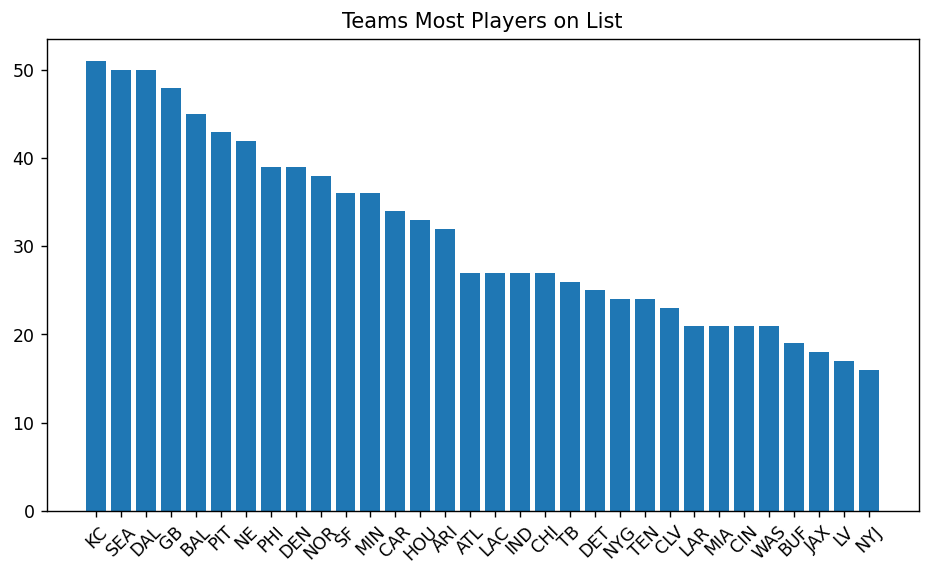

In [4]:
team = df.groupby('Team').count()
team = team.sort_values('Points', ascending=False)

plt.figure(figsize=(9,5) , dpi = 125)
plt.bar(team.index, team['Points'])
plt.xticks(rotation = 45)
plt.title('Teams Most Players on List')
plt.show()

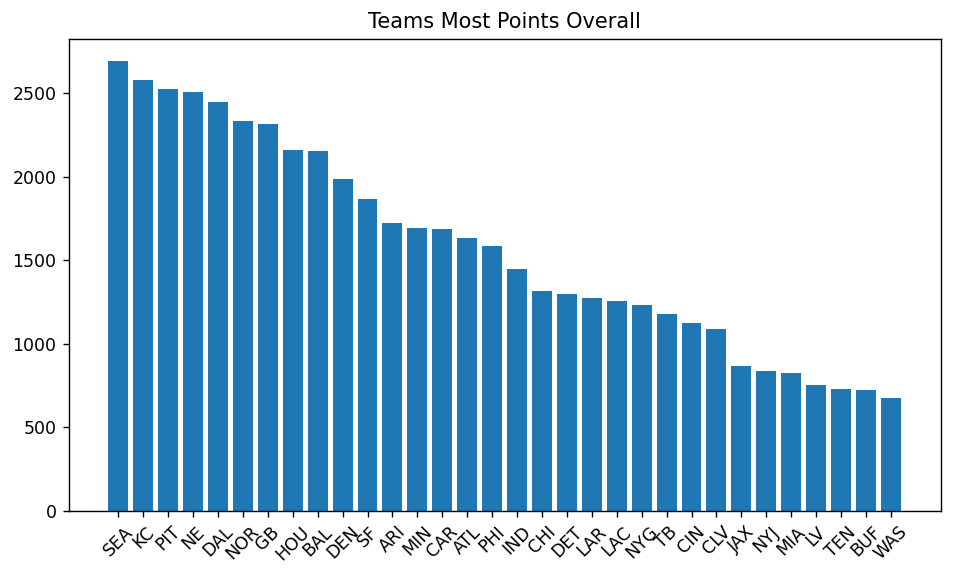

In [5]:
team = df.groupby('Team').sum()
team = team.sort_values('Points', ascending=False)

plt.figure(figsize=(9,5) , dpi = 125)
plt.bar(team.index, team['Points'])
plt.xticks(rotation = 45)
plt.title('Teams Most Points Overall')
plt.show()

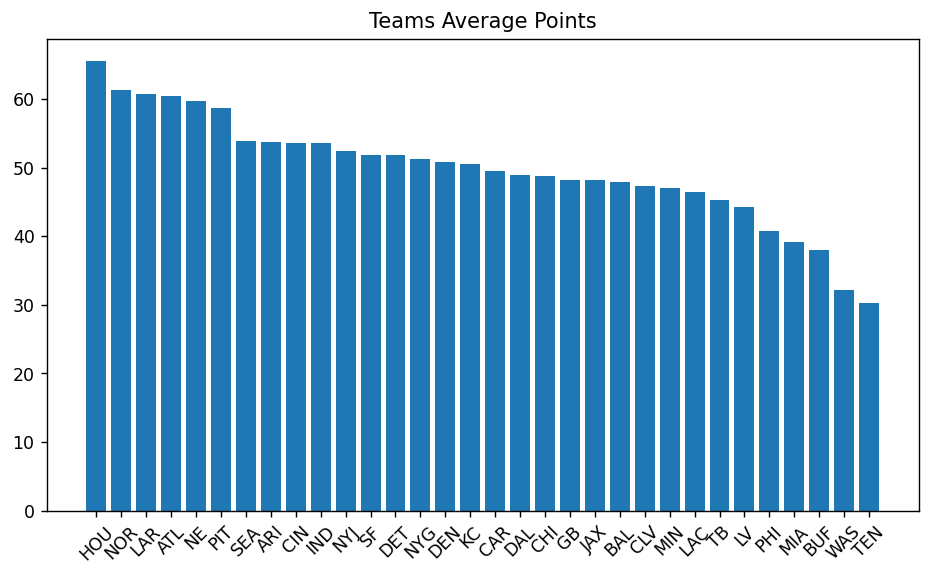

In [6]:
team = df.groupby('Team').mean()
team = team.sort_values('Points', ascending=False)

plt.figure(figsize=(9,5) , dpi = 125)
plt.bar(team.index, team['Points'])
plt.xticks(rotation = 45)
plt.title('Teams Average Points')
plt.show()

## Individual Players

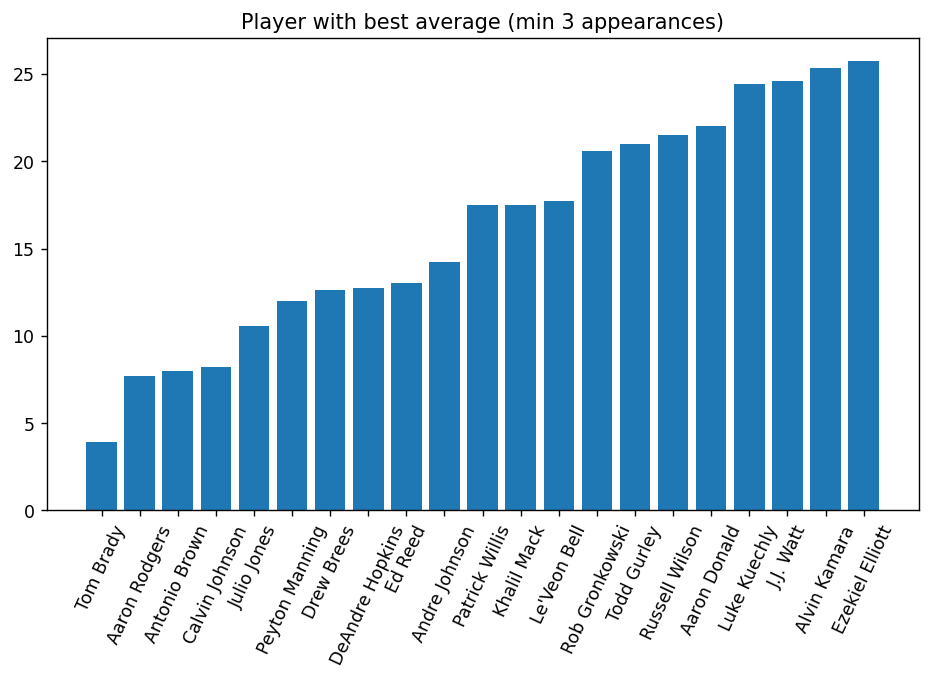

In [7]:
player = df.groupby('Player').mean()
player = player.loc[player['count']>=3]
player = player.sort_values('Rank', ascending=True)
player = player.iloc[0:21]

plt.figure(figsize=(9,5) , dpi = 125)
plt.bar(player.index, player['Rank'])
plt.xticks(rotation = 65)
plt.title('Player with best average (min 3 appearances)')
plt.show()

## Top 10s

In [8]:
tt = df.loc[df['Rank']<=10]
tt

Rank Position Team  Points  count
Year Player                                                
2010 Tom Brady               1       QB   NE     100     10
     Peyton Manning          2       QB  IND      99      5
     Adrian Peterson         3       RB  MIN      98      7
     Ray Lewis               4       LB  BAL      97      2
     Ed Reed                 5        S  BAL      96      3
...                        ...      ...  ...     ...    ...
2019 Christian McCaffrey     6       RB  CAR      95      2
     George Kittle           7       TE   SF      94      2
     DeAndre Hopkins         8       WR  HOU      93      4
     Stephon Gilmore         9       CB   NE      92      2
     Derrick Henry          10       RB  TEN      91      2

[100 rows x 5 columns]

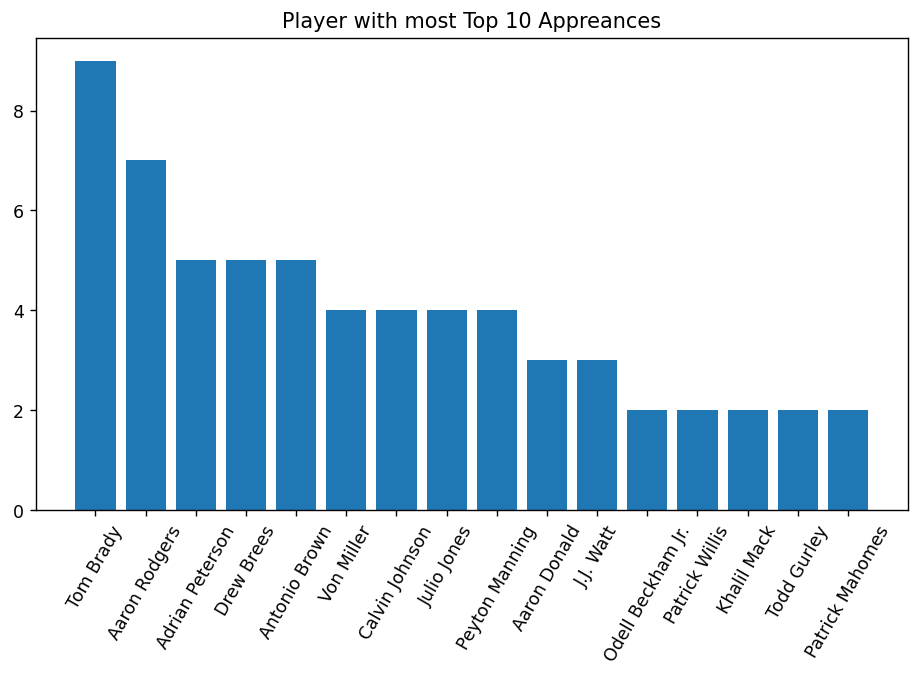

In [9]:
count = tt.groupby('Player').count()
count = count.sort_values('Points', ascending = False)
count = count.iloc[0:16]

plt.figure(figsize=(9,5) , dpi = 125)
plt.bar(count.index, count['Rank'])
plt.xticks(rotation = 60)
plt.title('Player with most Top 10 Appreances')
plt.show()

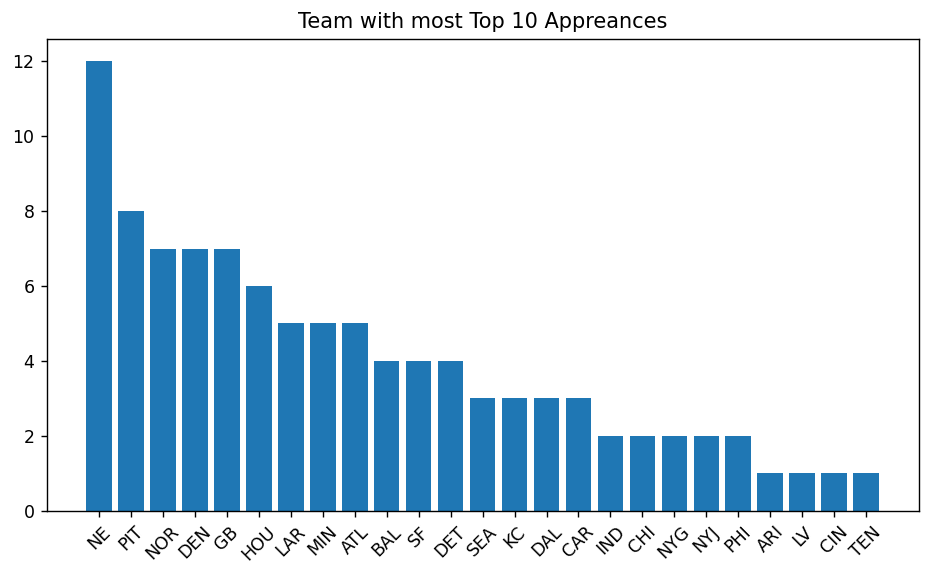

In [10]:
team = tt.groupby('Team').count()
team = team.sort_values('Points', ascending=False)

plt.figure(figsize=(9,5) , dpi = 125)
plt.bar(team.index, team['Rank'])
plt.xticks(rotation = 45)
plt.title('Team with most Top 10 Appreances')
plt.show()

## By Position

In [11]:
json_file = requests.get('https://raw.githubusercontent.com/juwon0502/NFL-Top-100/main/Data/position.json')
position_abv = json.loads(json_file.text)

In [14]:
def graph_pos(position, df, cora):
  plt.figure(figsize=(9,5), dpi=125)
  plt.bar(df.index, df['Rank'])
  plt.xticks(rotation = 45)
  if cora == "A":
    plt.title(f'Top {len(df)} {position} (Average rank)')
  else:
    plt.title(f'Top {len(df)} {position} Appearances')
  plt.show()
  print('\n\n')

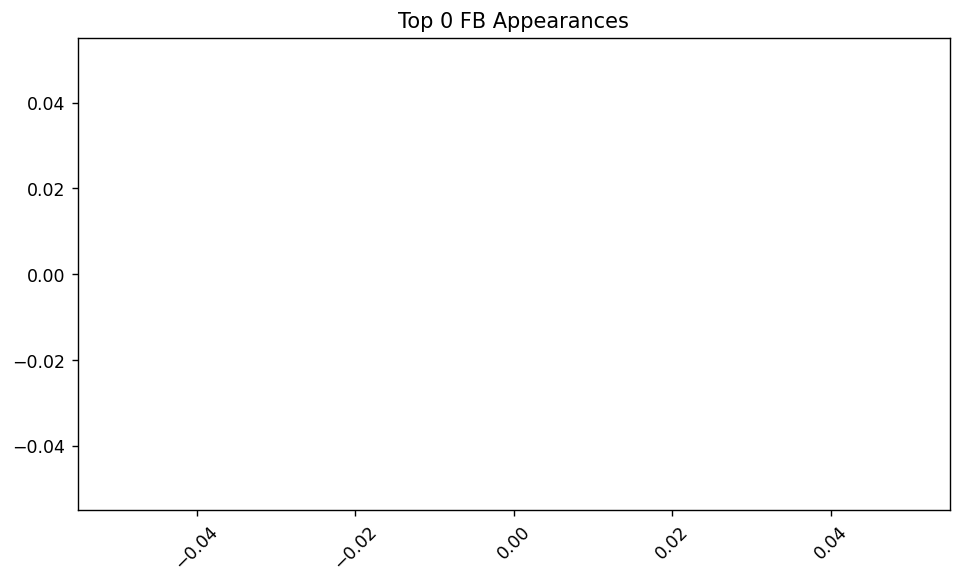

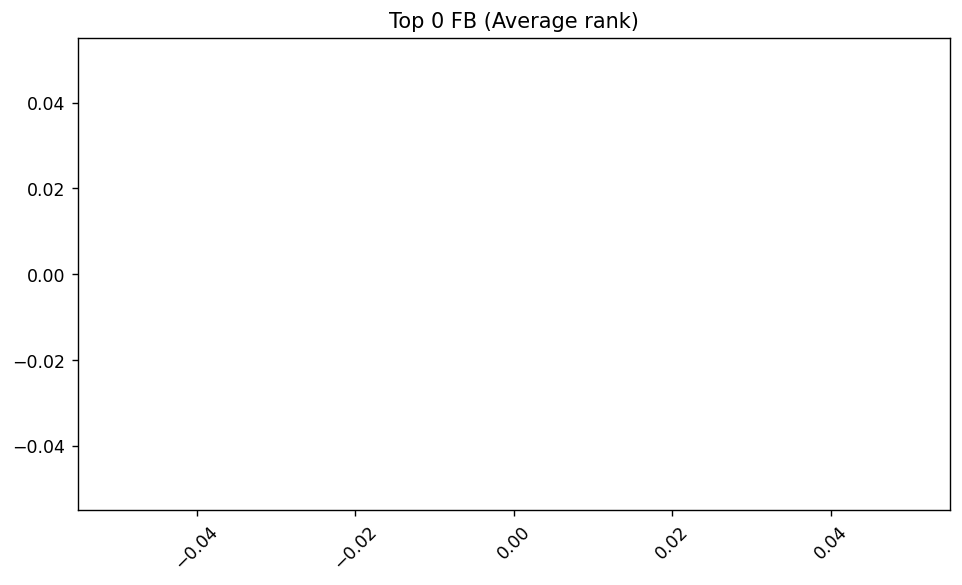

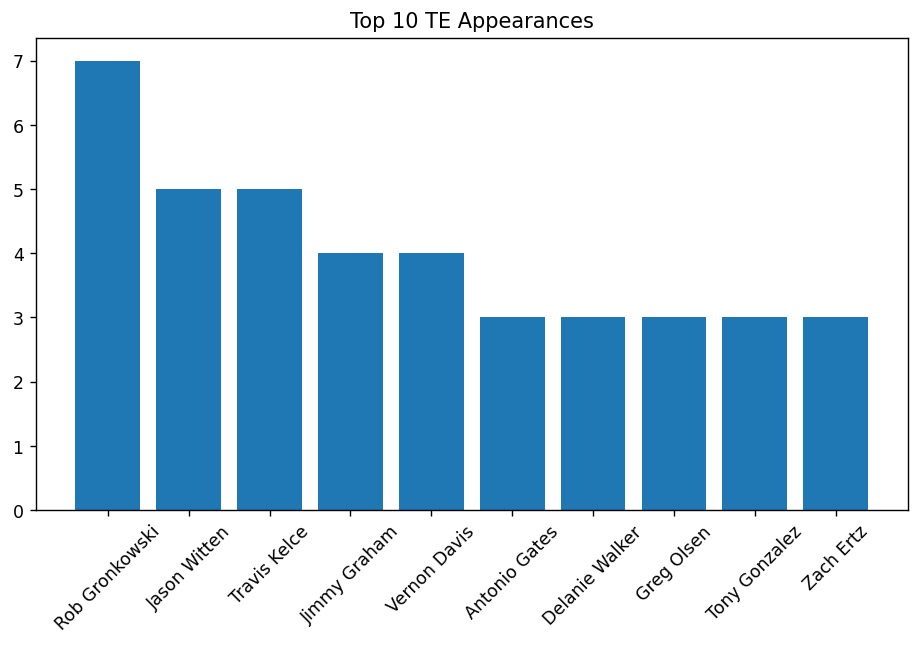

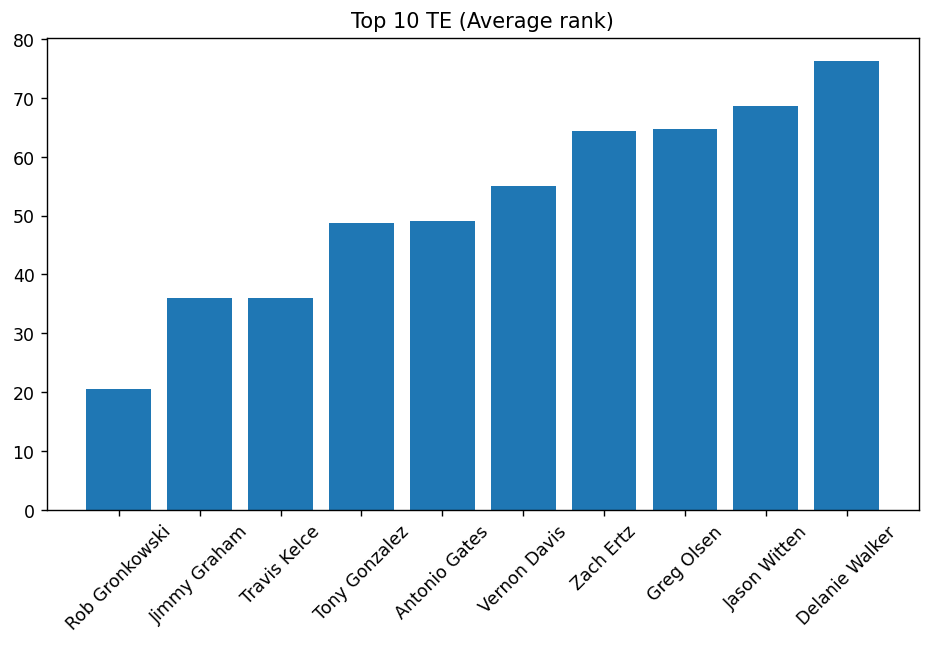

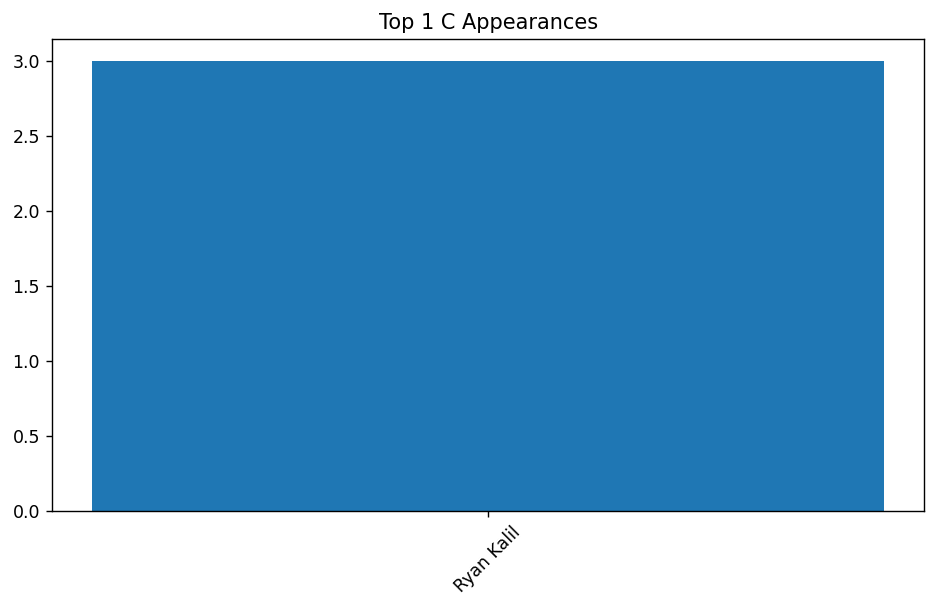

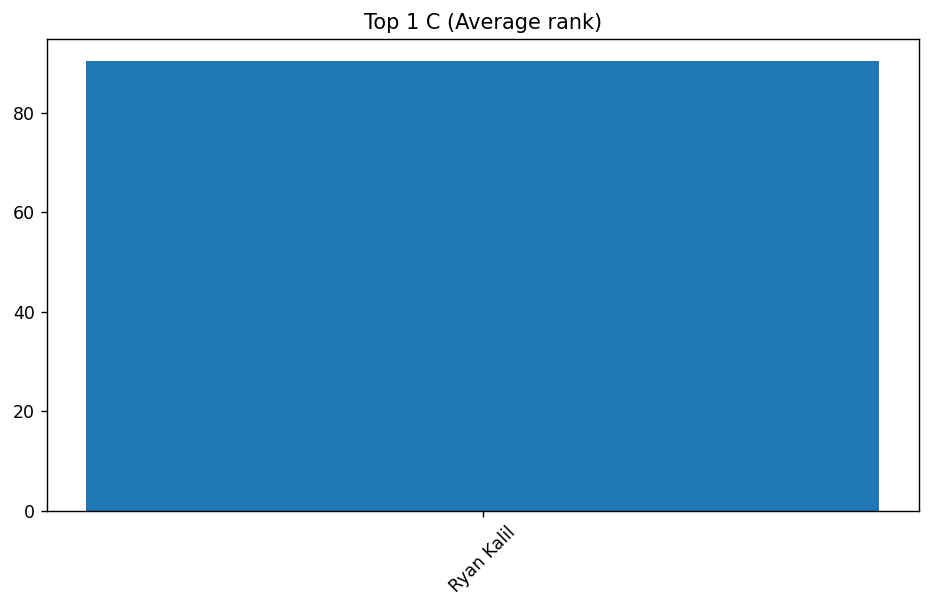

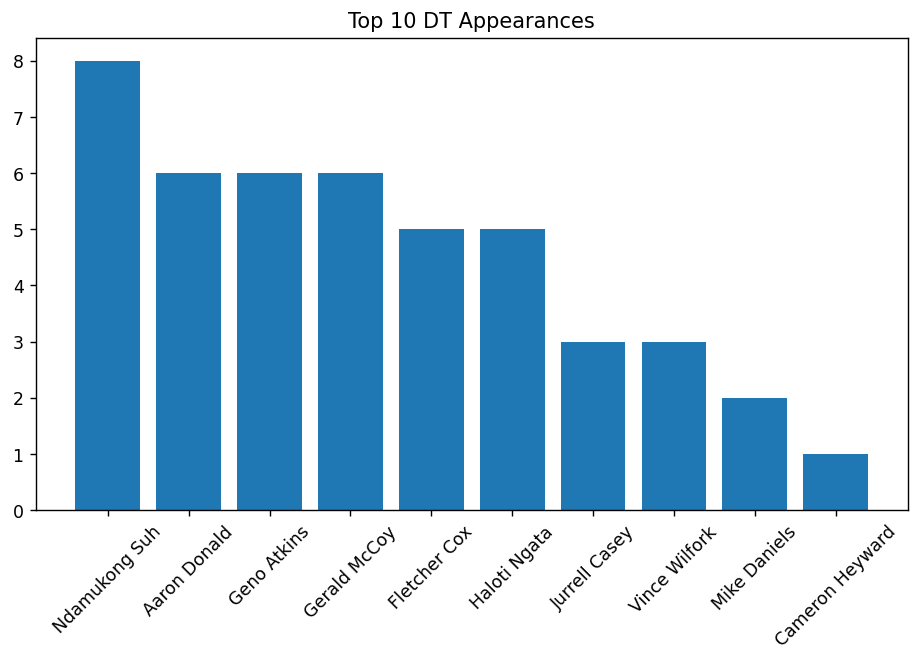

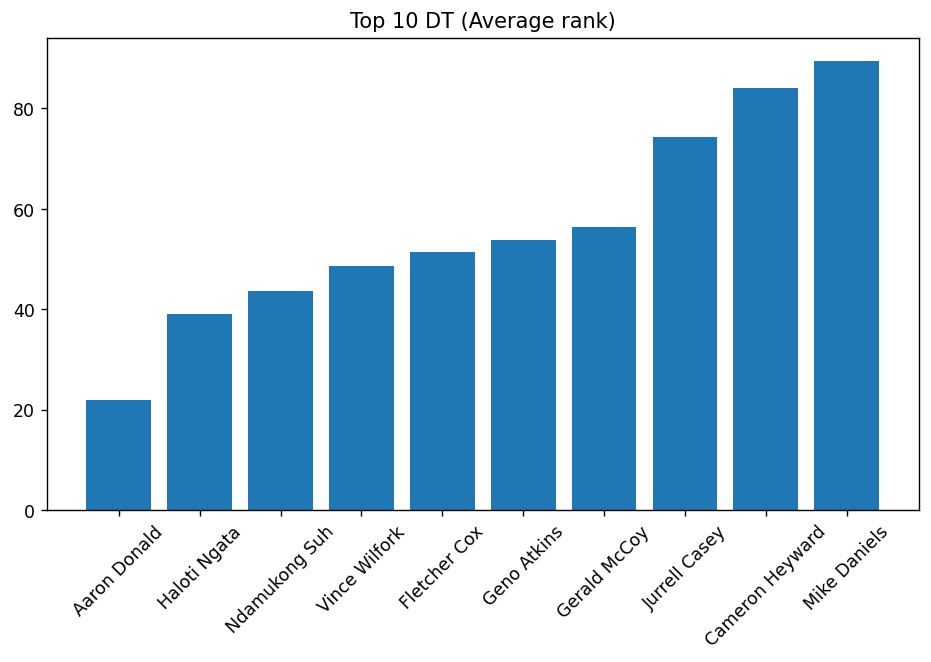

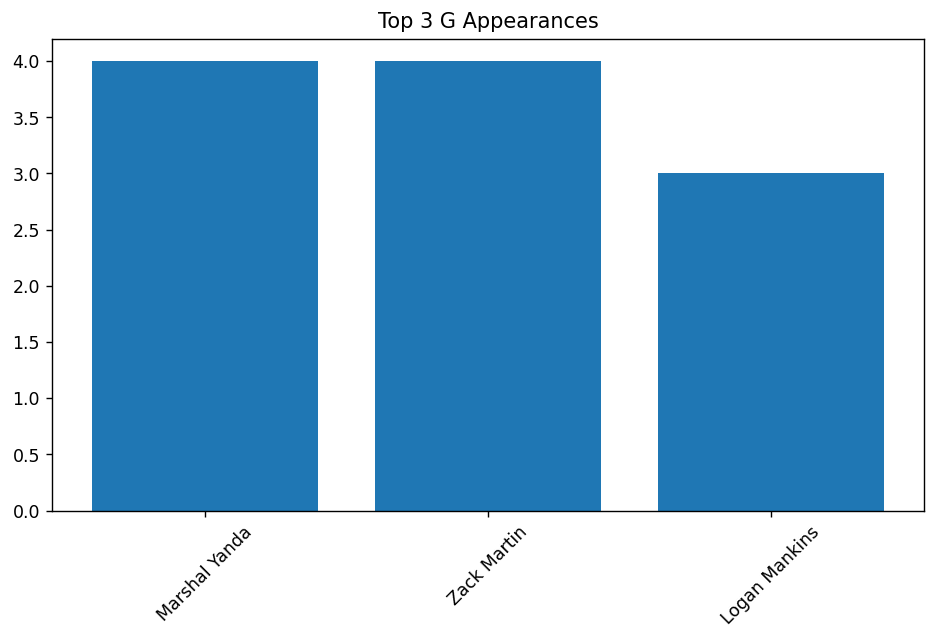

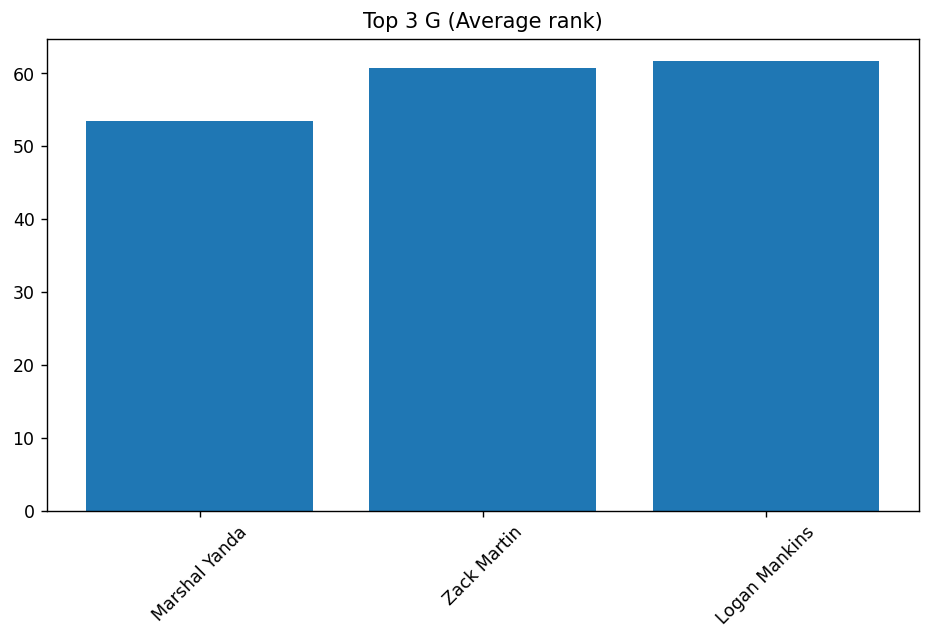

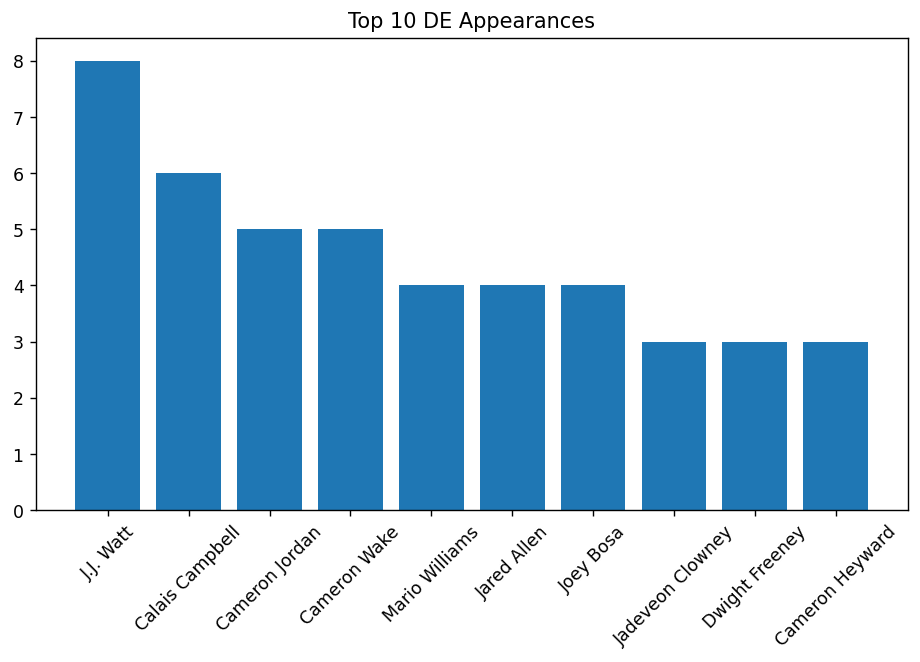

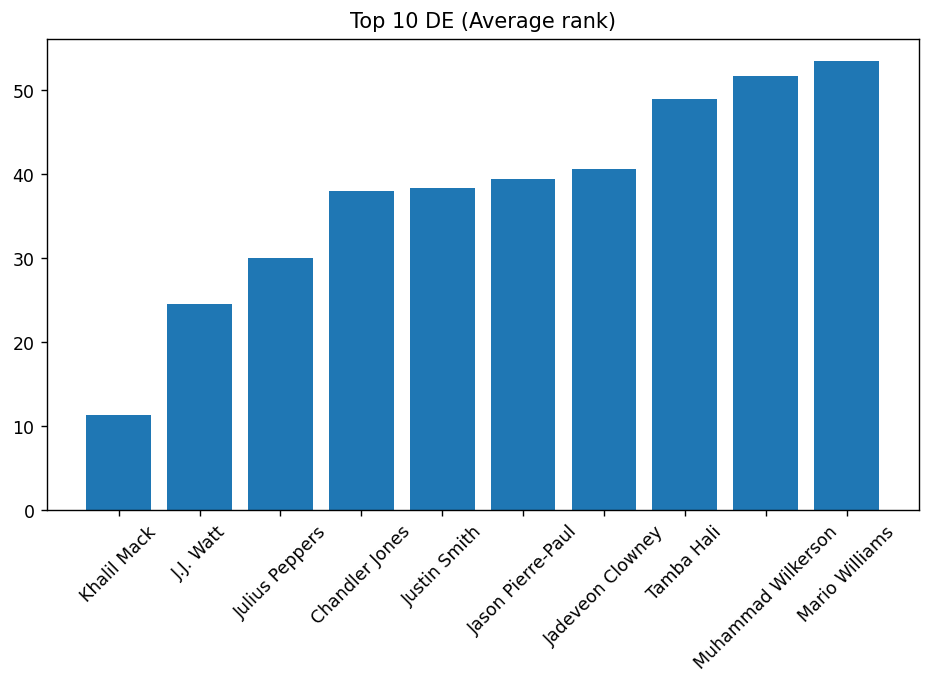

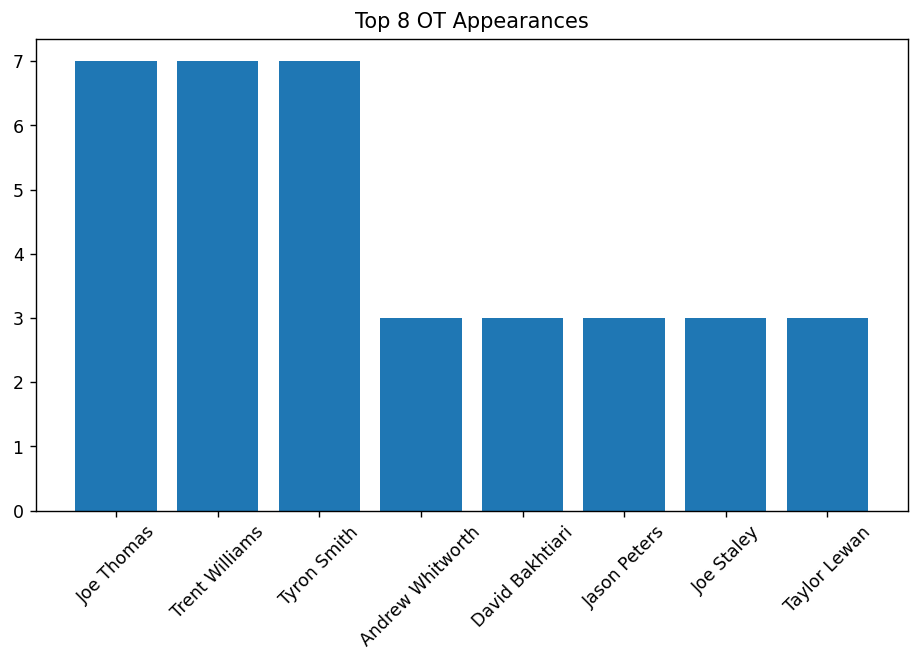

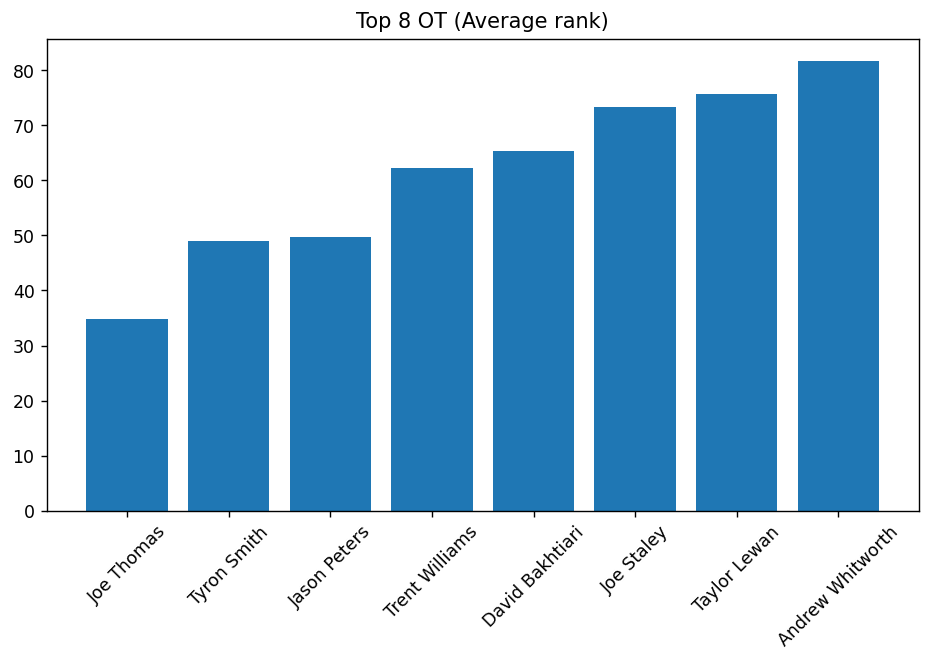

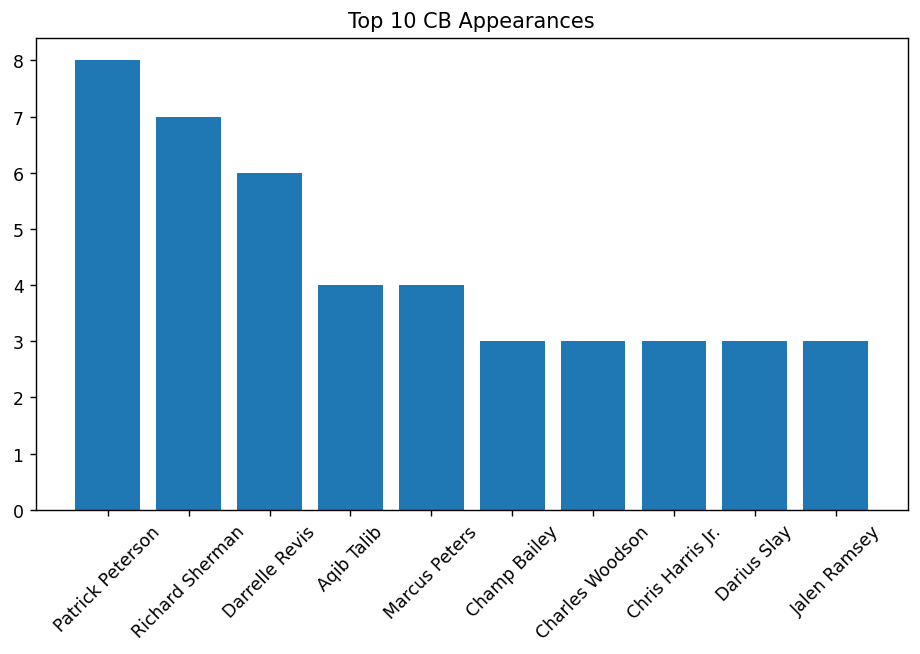

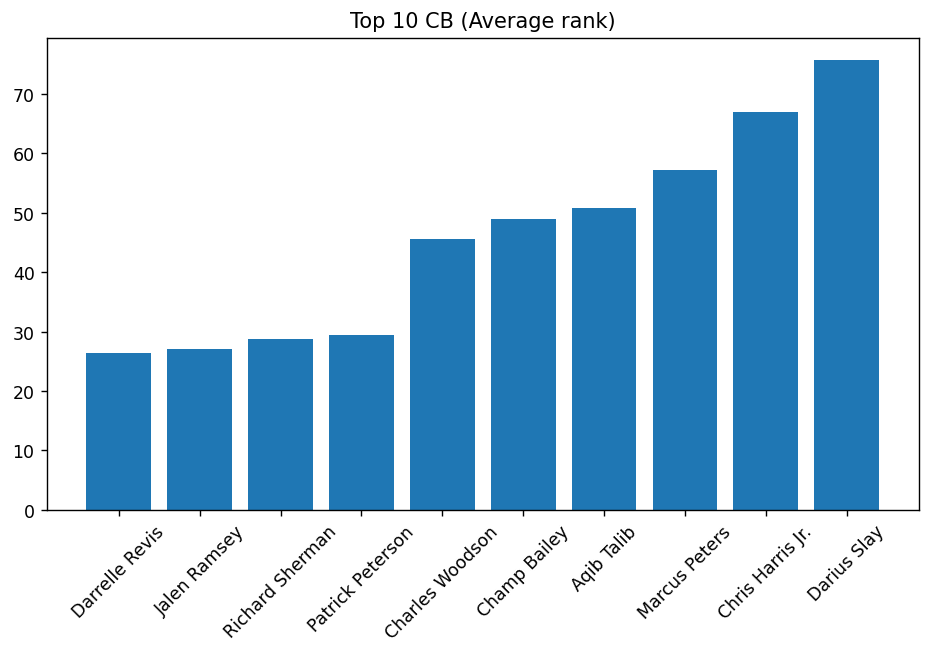

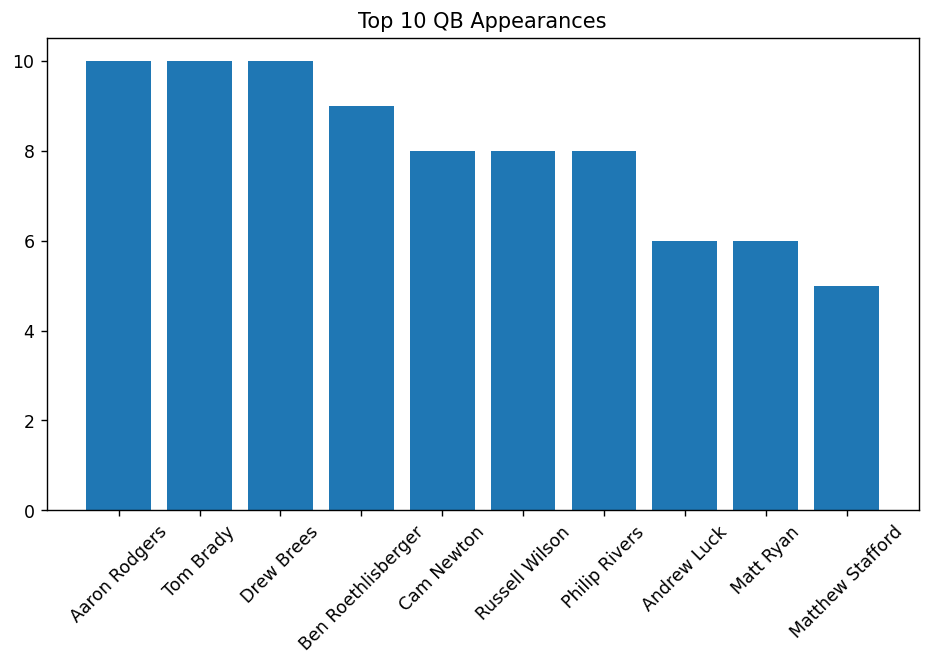

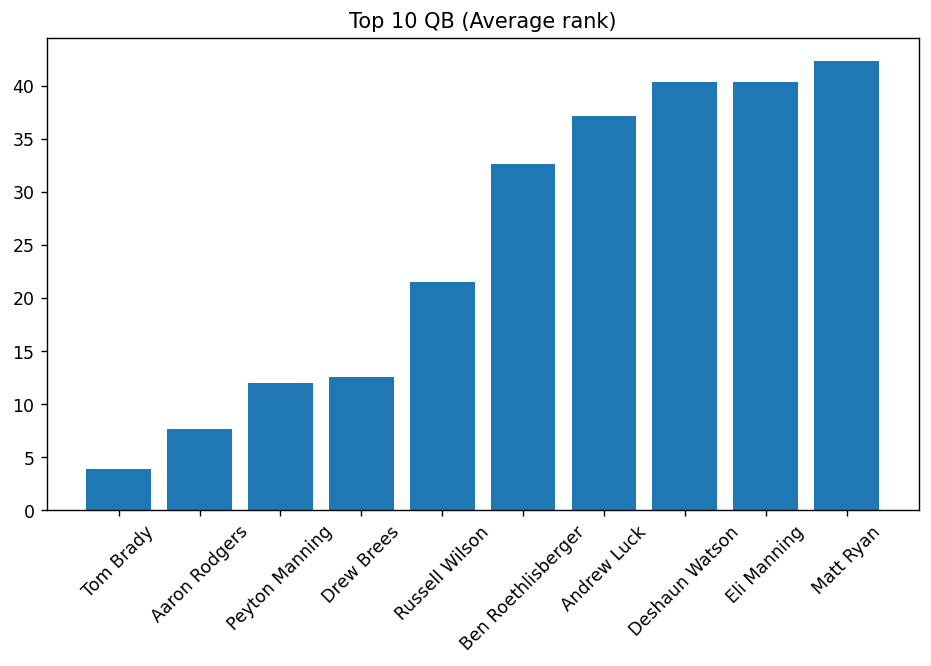

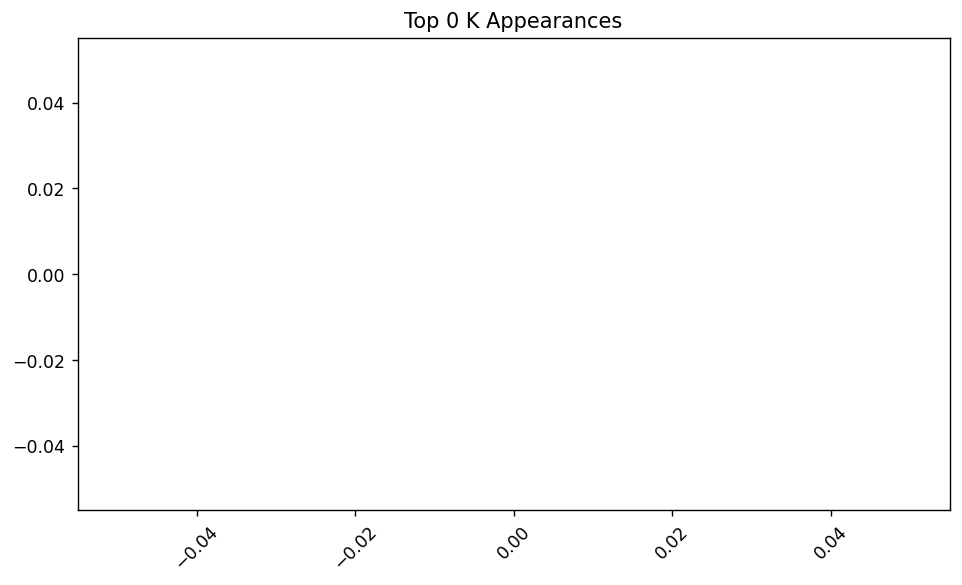

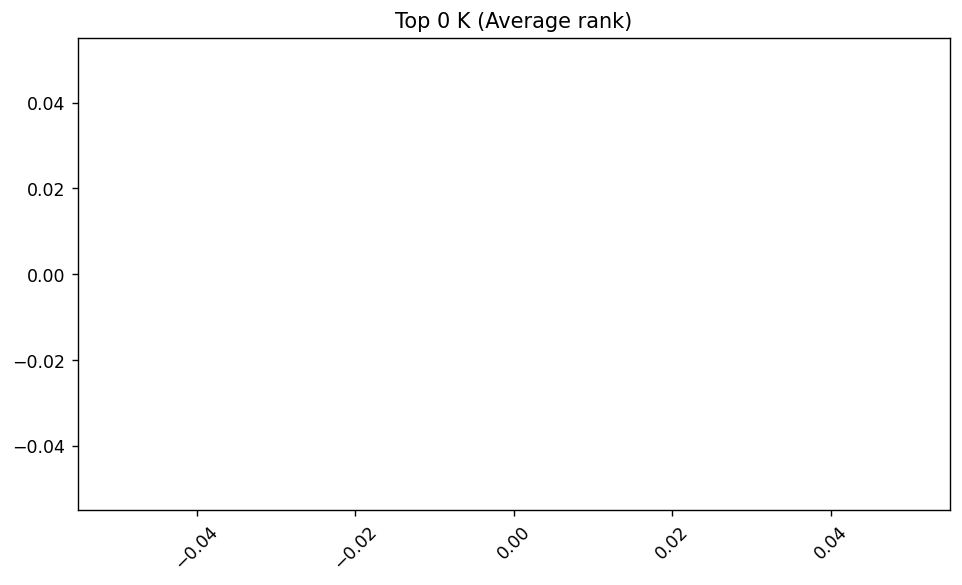

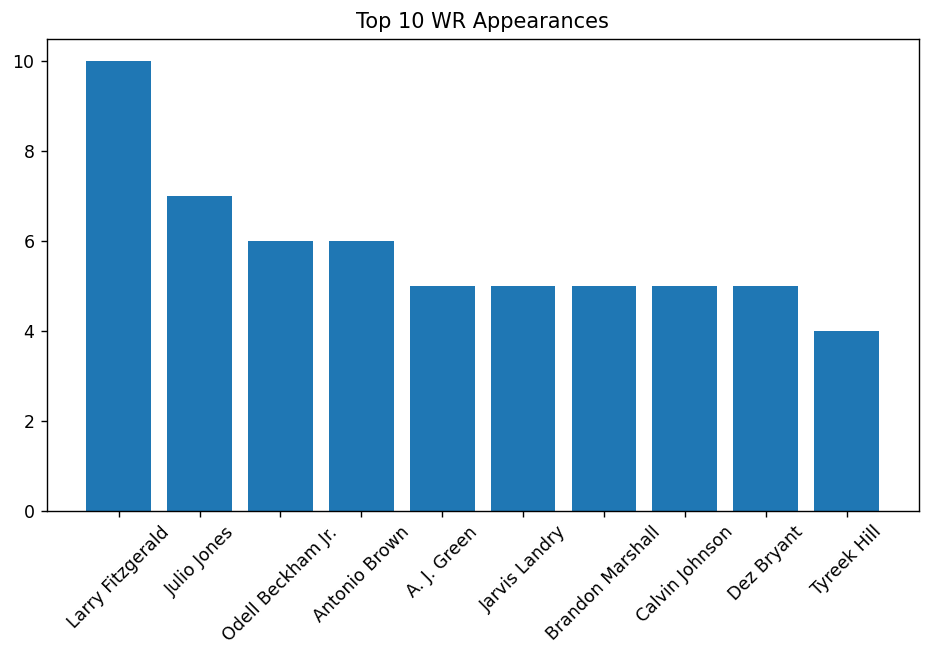

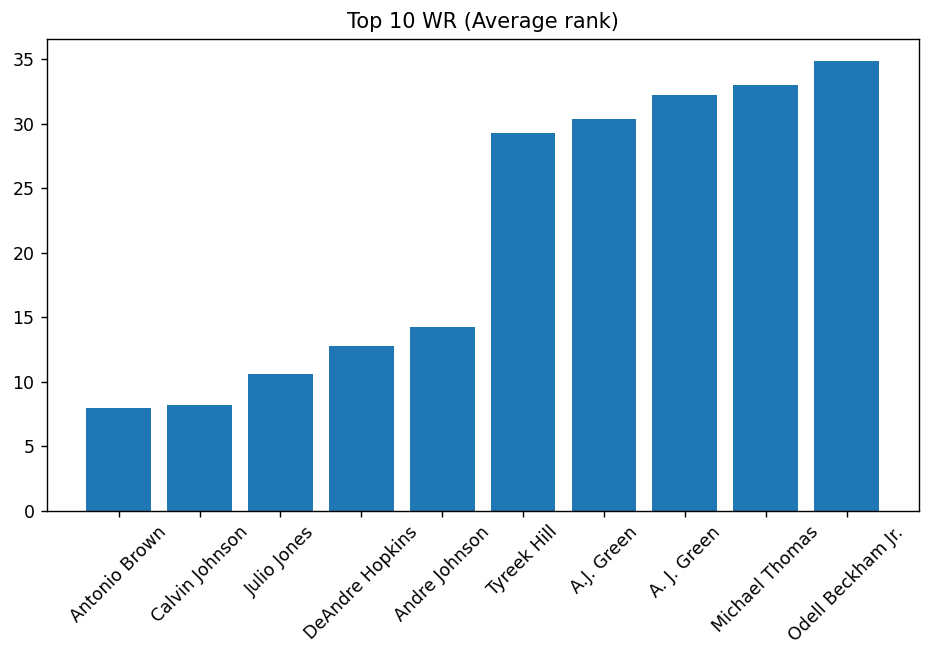

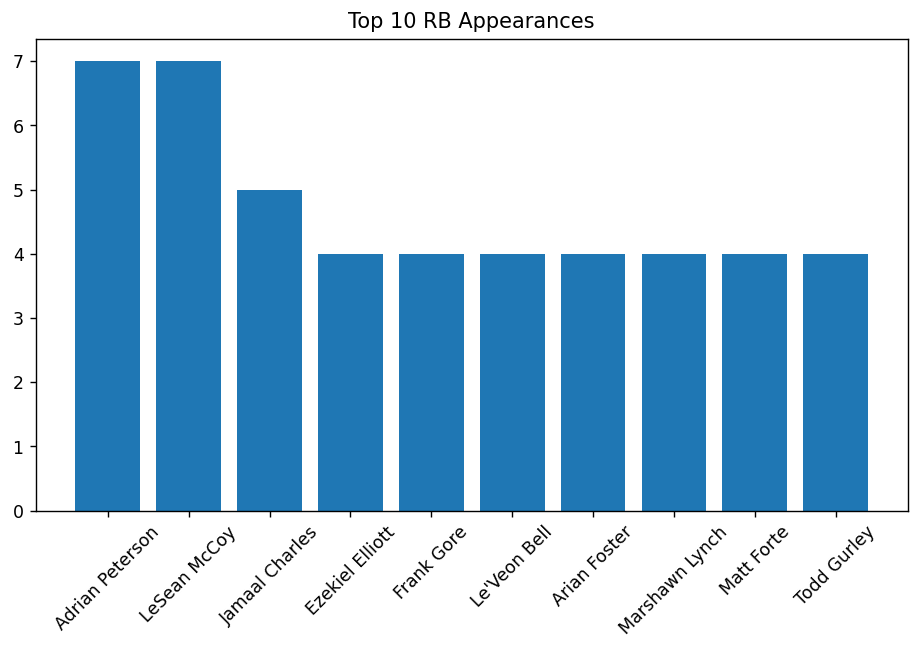

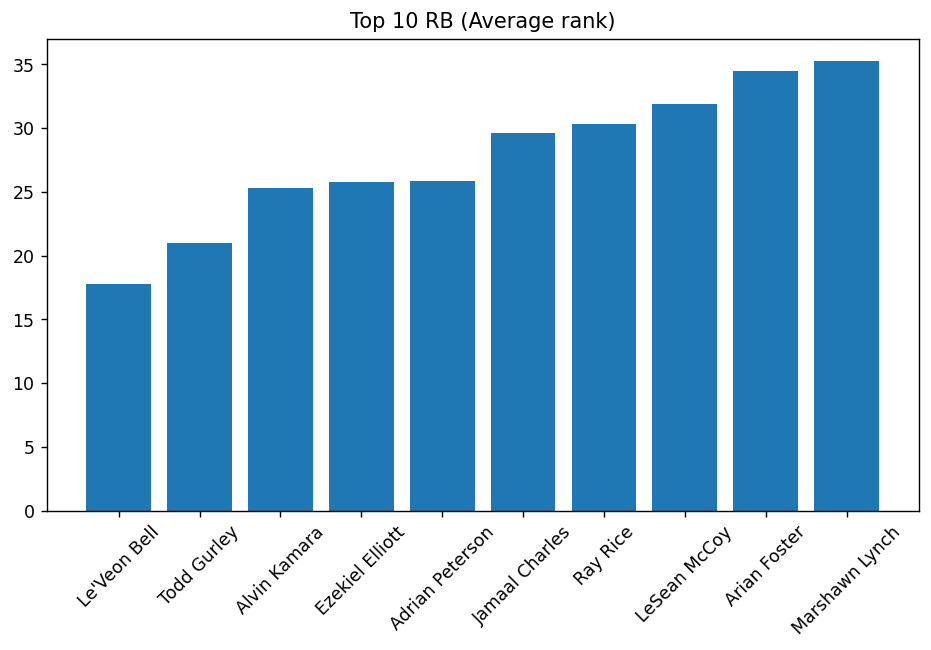

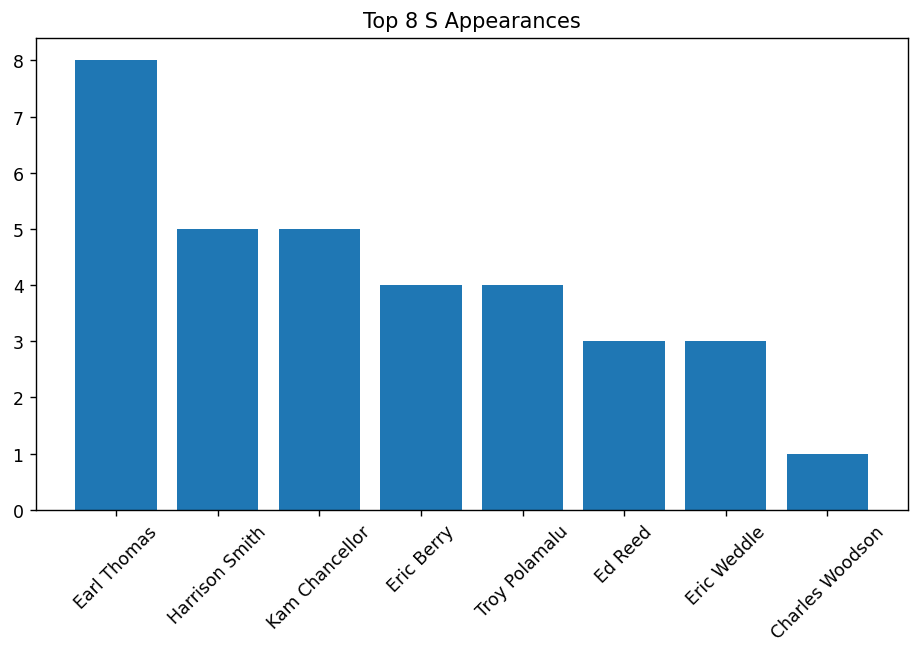

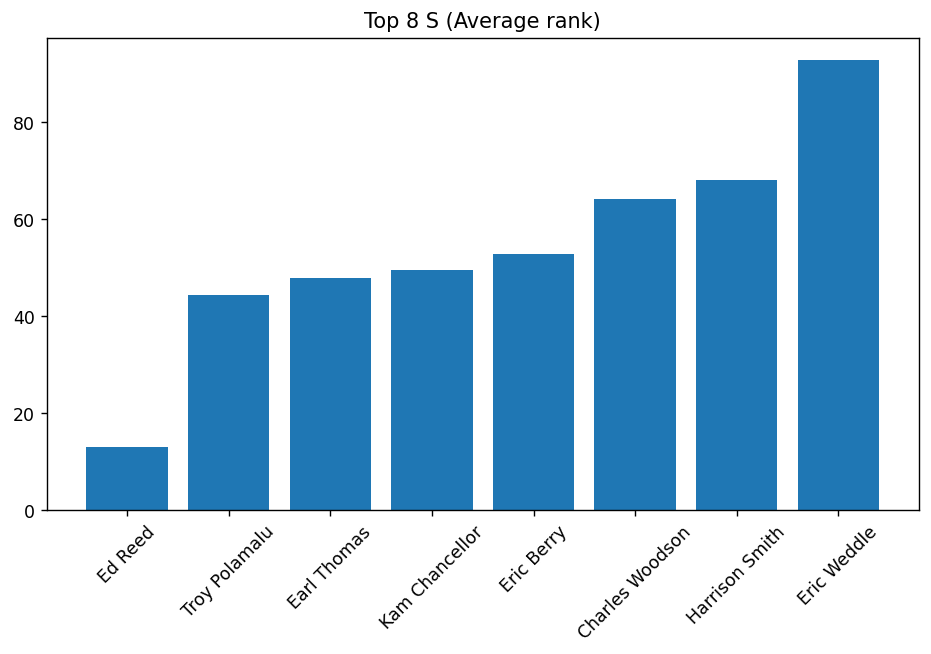

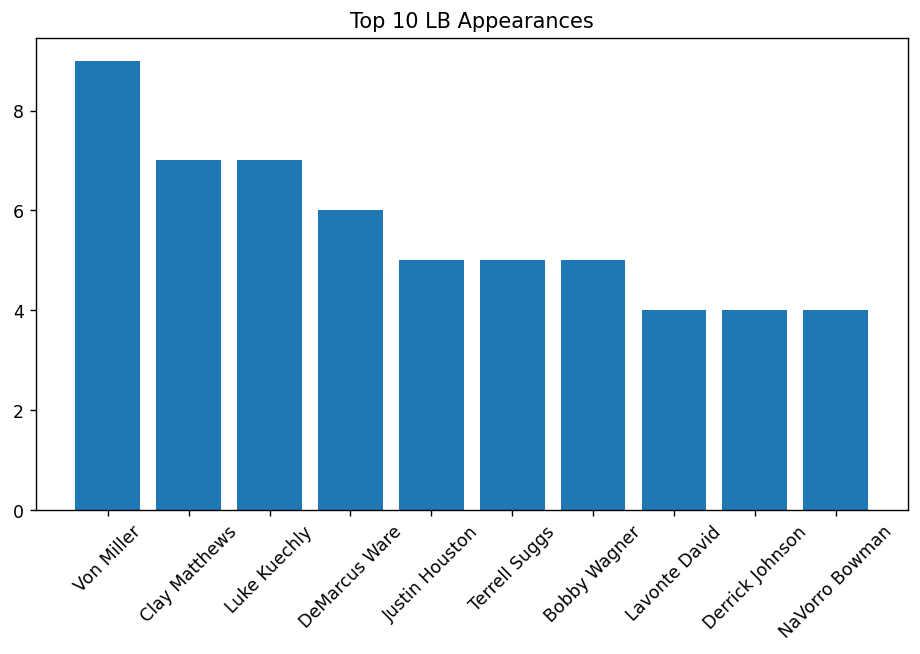

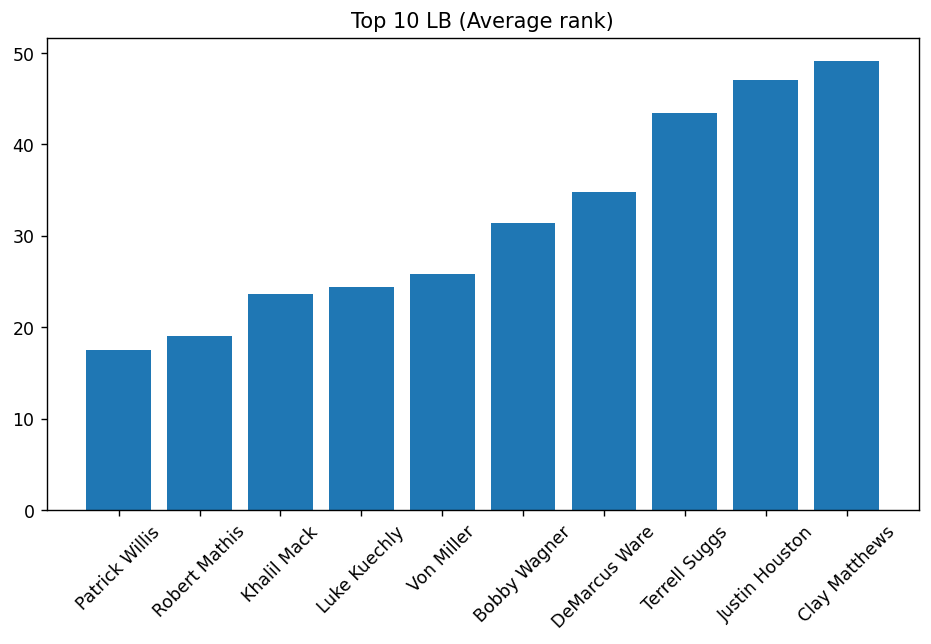

In [17]:
temp = pd.DataFrame()
positions = [position_abv[pos] for pos in position_abv]
pos_set = set(positions)
pos_set
for pos in pos_set:
  temp = temp.iloc[0:0]
  temp = al3.loc[al3['Position'] == pos]
  count = temp.groupby('Player').count()
  count = count.sort_values('Points', ascending=False)
  count = count.iloc[0:10]
  graph_pos(pos, count, 'C')
  avg = temp.groupby('Player').mean()
  avg = avg.sort_values('Rank')
  avg = avg.iloc[0:10]
  graph_pos(pos, avg, 'A')


####Some other things I want to consider
* Unique top 10 players from each team
* positional value
* etc

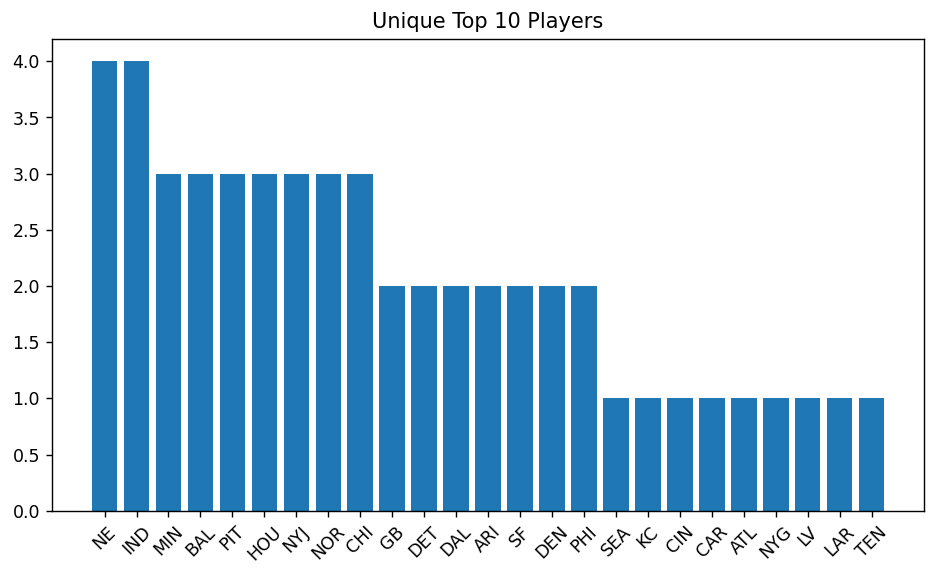

In [28]:
df3 = pd.read_csv('https://raw.githubusercontent.com/juwon0502/NFL-Top-100/main/Data/Top%20100%20Players%20Master%20Dataset.csv', index_col=['Player', 'Team'])
df3 = df3.loc[df3['Rank']<=10]
uttt = {}
for player in list(df3.index.unique()):
  if player[1] not in uttt:
    uttt[player[1]] = 1
  else:
    uttt[player[1]] = uttt[player[1]]+1

uttt_list = []

for team in uttt:
  uttt_list.append([team,uttt[team]])
uttt_list = sorted(uttt_list, key=lambda x: x[1])
uttt_list.reverse()

uttt_df = pd.DataFrame(uttt_list, columns = ['Team', 'Count'])

plt.figure(figsize=(9,5), dpi = 125)
plt.bar(uttt_df.Team, uttt_df.Count, align='center')
plt.xticks(range(len(uttt)), list(uttt.keys()))
plt.xticks(rotation = 45)
plt.title("Unique Top 10 Players")
plt.show()

In [75]:
df_position = df.groupby('Position').mean()
df_position = df_position.sort_values('Rank', ascending=True)
df_position['Average appearance'] = df_position['count']
df_position = df_position.drop(columns = ['Points','count'])

df_position_count = df.groupby('Position').count()
df_position_count = df_position_count.drop(columns=['Rank', 'Team', 'Points'])

df_position = df_position.join(df_position_count)

In [34]:
import plotly.express as px

In [88]:
fig = px.scatter(df_position, x = df_position.Rank, y=df_position['count'], 
                 size = 'Average appearance', hover_name=df_position.index, 
                 title='Positional Value', color=df_position.index)
fig.show()

####Some other interesting things
 * only two players have made the top 10 with different teams (Peyton Manning, Khalil Mack)
 * only 4 players have made the list all 10 years (Tom Brady, Drew Brees, Aaron Rodgers, and Larry Fitzgerald)